In [ ]:
!pip install requests beautifulsoup4 pandas

In [ ]:
!pip install ipeadatapy

In [ ]:
import ipeadatapy as ipea
import pandas as pd

df = ipea.list_series()

In [ ]:
df.head()

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABPEBV,Abate - bovinos - peso das carcaças
2,ABATE_ABPESU,Abate - suínos - peso das carcaças
3,ABATE_ABQUAV,Abate - aves - quantidade
4,ABATE_ABQUBV,Abate - bovinos - quantidade


In [ ]:
df

,CODE,NAME
0,ABATE_ABPEAV,Abate - aves - peso das carcaças
1,ABATE_ABPEBV,Abate - bovinos - peso das carcaças
2,ABATE_ABPESU,Abate - suínos - peso das carcaças
3,ABATE_ABQUAV,Abate - aves - quantidade
4,ABATE_ABQUBV,Abate - bovinos - quantidade
...,...,...
8974,PNADCT_TXPARTCUF_SI,Taxa de participação - sem instrução ou equiva...
8975,PNAD_IAGRV,Domicílios com insegurança alimentar grave
8976,PNAD_IALEV,Domicílios com insegurança alimentar leve
8977,PNAD_IAMOD,Domicílios com insegurança alimentar moderada


In [ ]:
babacu = ipea.timeseries('EIA366_PBRENT366')
babacu

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN
1986-01-06,EIA366_PBRENT366,1986-01-06T00:00:00-02:00,6,1,1986,NaN
1986-01-07,EIA366_PBRENT366,1986-01-07T00:00:00-02:00,7,1,1986,NaN
1986-01-08,EIA366_PBRENT366,1986-01-08T00:00:00-02:00,8,1,1986,NaN
...,...,...,...,...,...,...
2024-06-25,EIA366_PBRENT366,2024-06-25T00:00:00-03:00,25,6,2024,86.81
2024-06-26,EIA366_PBRENT366,2024-06-26T00:00:00-03:00,26,6,2024,85.76
2024-06-27,EIA366_PBRENT366,2024-06-27T00:00:00-03:00,27,6,2024,87.00


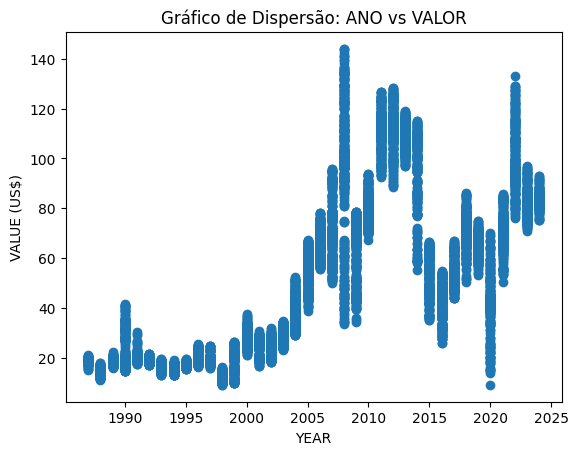

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(babacu['YEAR'], babacu['VALUE (US$)'])

plt.xlabel('YEAR')
plt.ylabel('VALUE (US$)')
plt.title('Gráfico de Dispersão: ANO vs VALOR')
plt.show()

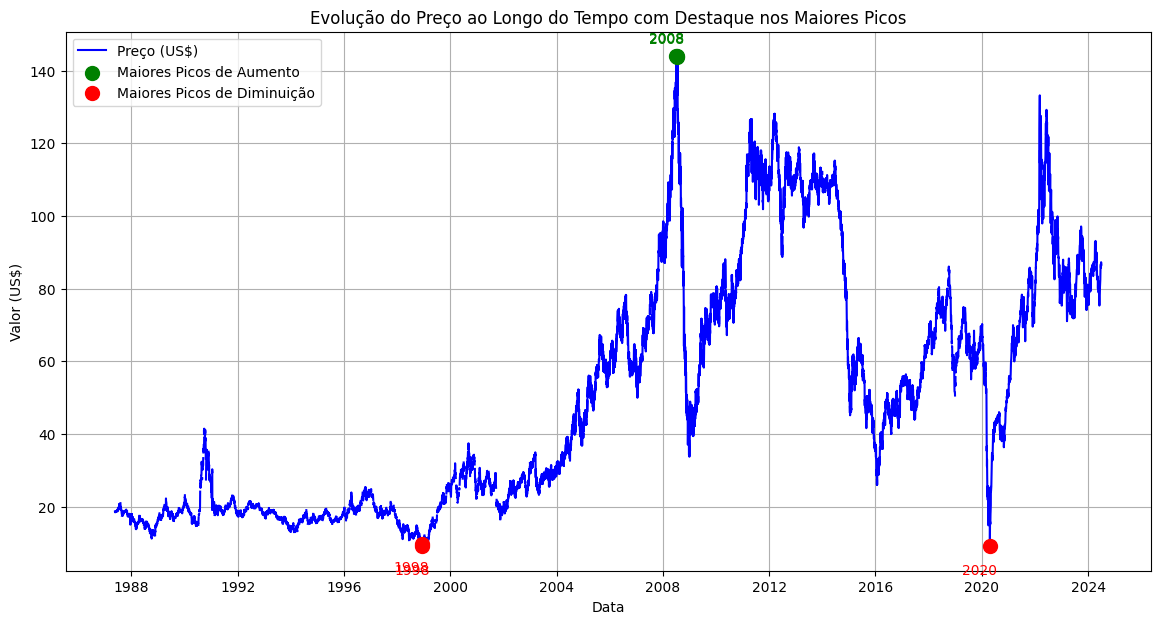

In [ ]:
import ipeadatapy as ipea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obter os dados
babacu = ipea.timeseries('EIA366_PBRENT366')

# Resetar o índice para usar a coluna de datas
babacu = babacu.reset_index()

# Certificar que a coluna 'DATE' está no formato de datetime
babacu['DATE'] = pd.to_datetime(babacu['DATE'])

# Ordenar os dados por data
babacu = babacu.sort_values(by='DATE')

# Extrair valores e datas
values = babacu['VALUE (US$)'].values
dates = babacu['DATE'].values

# Identificar picos de alta e baixa
picos_aumento_indices = np.argwhere((values > np.roll(values, 1)) & (values > np.roll(values, -1))).flatten()
picos_diminuicao_indices = np.argwhere((values < np.roll(values, 1)) & (values < np.roll(values, -1))).flatten()

# Selecionar os 3 maiores picos de aumento
top_3_increase_indices = picos_aumento_indices[np.argsort(values[picos_aumento_indices])[-3:]]

# Selecionar os 3 maiores picos de diminuição
top_3_decrease_indices = picos_diminuicao_indices[np.argsort(values[picos_diminuicao_indices])[:3]]

# Extrair os anos correspondentes aos picos de aumento e diminuição
years = babacu['DATE'].dt.year.values

# Selecionar os anos dos 3 maiores picos de aumento
top_3_increase_years = years[top_3_increase_indices]

# Selecionar os anos dos 3 maiores picos de diminuição
top_3_decrease_years = years[top_3_decrease_indices]

# Plotar gráfico de linha
plt.figure(figsize=(14, 7))
plt.plot(babacu['DATE'], babacu['VALUE (US$)'], label='Preço (US$)', color='blue')

# Destaque para os 3 maiores picos de aumento
plt.scatter(dates[top_3_increase_indices], values[top_3_increase_indices], color='green', s=100, label='Maiores Picos de Aumento', zorder=5)
for i, txt in enumerate(top_3_increase_years):
    plt.annotate(txt, (dates[top_3_increase_indices[i]], values[top_3_increase_indices[i]]), xytext=(-20, 10), textcoords='offset points', fontsize=10, color='green')

# Destaque para os 3 maiores picos de diminuição
plt.scatter(dates[top_3_decrease_indices], values[top_3_decrease_indices], color='red', s=100, label='Maiores Picos de Diminuição', zorder=5)
for i, txt in enumerate(top_3_decrease_years):
    plt.annotate(txt, (dates[top_3_decrease_indices[i]], values[top_3_decrease_indices[i]]), xytext=(-20, -20), textcoords='offset points', fontsize=10, color='red')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Valor (US$)')
plt.title('Evolução do Preço ao Longo do Tempo com Destaque nos Maiores Picos')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import ipeadatapy as ipea

# Carregar os dados do IPEA
babacu = ipea.timeseries('EIA366_PBRENT366')

# Calcular as métricas estatísticas
media = babacu['VALUE (US$)'].mean()
desvio_padrao = babacu['VALUE (US$)'].std()
minimo = babacu['VALUE (US$)'].min()
maximo = babacu['VALUE (US$)'].max()
percentil_25 = babacu['VALUE (US$)'].quantile(0.25)
percentil_75 = babacu['VALUE (US$)'].quantile(0.75)
moda = babacu['VALUE (US$)'].mode().values[0]  # Pode haver mais de uma moda
mediana = babacu['VALUE (US$)'].median()

# Calcular correlação (exemplo com os próprios dados, pode variar conforme as séries disponíveis)
# correlacao = babacu['VALUE (US$)'].corr(outra_serie['VALUE (US$)'])

# Calcular volatilidade
range_interquartil = babacu['VALUE (US$)'].quantile(0.75) - babacu['VALUE (US$)'].quantile(0.25)
coeficiente_variacao = desvio_padrao / media

# Criar o DataFrame com as métricas calculadas
data = {
    'Métrica': ['Média', 'Desvio Padrão', 'Mínimo', 'Máximo', '25º Percentil', '75º Percentil',
                'Moda', 'Mediana', 'Coeficiente de Variação'],
    'Valor': [media, desvio_padrao, minimo, maximo, percentil_25, percentil_75, moda, mediana, coeficiente_variacao]
}

df_metricas = pd.DataFrame(data)

# Exibir o DataFrame com as métricas
print("Métricas Estatísticas dos Preços do Petróleo:")
df_metricas.head(10)


Métricas Estatísticas dos Preços do Petróleo:


,Métrica,Valor
0,Média,53.110478
1,Desvio Padrão,33.215821
2,Mínimo,9.100000
3,Máximo,143.950000
4,25º Percentil,20.530000
5,75º Percentil,76.610000
6,Moda,18.480000
7,Mediana,48.400000
8,Coeficiente de Variação,0.625410


Interpretação do Coeficiente de Variação:
Baixo Coeficiente de Variação: Indica que os dados têm pouca dispersão em relação à média, sugerindo maior consistência ou estabilidade nos valores.

Alto Coeficiente de Variação: Indica que os dados apresentam uma maior dispersão em relação à média, sugerindo maior variabilidade ou volatilidade nos valores.

Interpretação Prática:
Alto Coeficiente de Variação: Valores próximos ou acima de 100% podem ser considerados altos. Isso significa que os dados variam significativamente em relação à média. Por exemplo, se um conjunto de dados tem um CV de 150%, isso indica que o desvio padrão é 1,5 vezes maior do que a média, o que implica em alta volatilidade ou variabilidade relativa.

Baixo Coeficiente de Variação: Valores abaixo de 50% podem ser considerados baixos. Isso indica que os dados variam pouco em relação à média. Um CV de 25%, por exemplo, indica que o desvio padrão é apenas 25% da média, sugerindo uma relativa estabilidade ou consistência nos valores.

In [ ]:
import pandas as pd

# Substitua esta parte pelo seu DataFrame 'babacu' já carregado
data = {
    'DATE': babacu.index,  # Supondo que 'DATE' seja o índice do seu DataFrame 'babacu'
    'VALUE (US$)': babacu['VALUE (US$)']  # Supondo que 'VALUE (US$)' seja a coluna com os valores de preço
}
babacu = pd.DataFrame(data)

# Calcular a média de cada ano
media_por_ano = babacu.groupby(babacu.index.year)['VALUE (US$)'].mean()

# Identificar os anos com as maiores e menores médias
anos_maiores_media = media_por_ano.nlargest(3).index.tolist()
anos_menores_media = media_por_ano.nsmallest(3).index.tolist()

# Criar o DataFrame com os resultados
dados_ranking = {
    'Rank': ['1º', '2º', '3º', 'Último', 'Penúltimo', 'Antepenúltimo'],
    'Ano': anos_maiores_media + anos_menores_media,
    'Média (US$)': [media_por_ano.loc[ano] for ano in anos_maiores_media] + [media_por_ano.loc[ano] for ano in anos_menores_media]
}

df_ranking = pd.DataFrame(dados_ranking)
df_ranking.head(10)


,Rank,Ano,Média (US$)
0,1º,2012,111.706880
1,2º,2011,111.285552
2,3º,2013,108.573697
3,Último,1998,12.758103
4,Penúltimo,1988,14.905412
5,Antepenúltimo,1994,15.856389


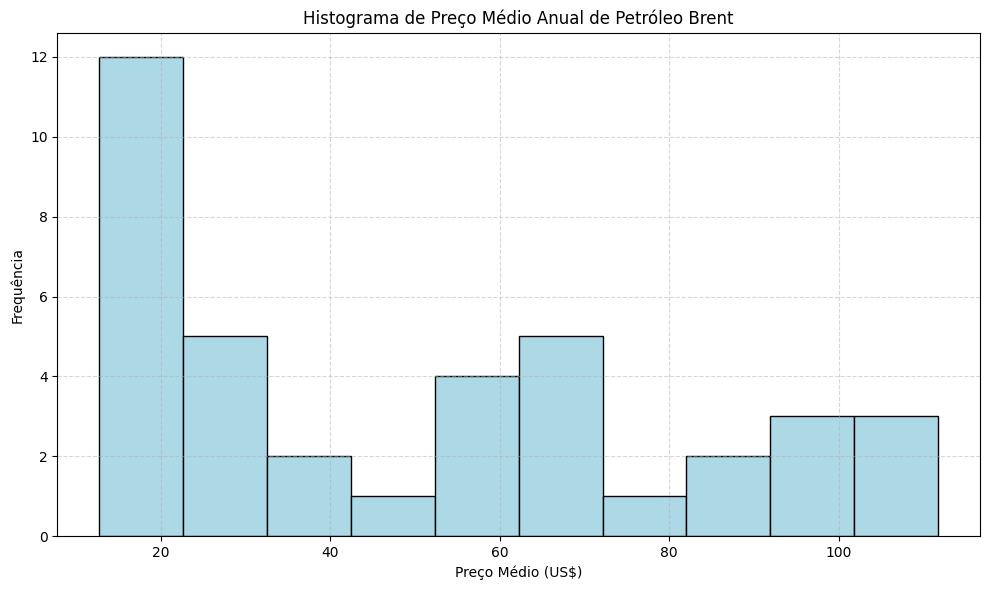

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Substitua esta parte pelo seu DataFrame 'babacu' já carregado
data = {
    'DATE': babacu.index,  # Supondo que 'DATE' seja o índice do seu DataFrame 'babacu'
    'VALUE (US$)': babacu['VALUE (US$)']  # Supondo que 'VALUE (US$)' seja a coluna com os valores de preço
}
babacu = pd.DataFrame(data)

# Calcular a média de cada ano
media_por_ano = babacu.groupby(babacu.index.year)['VALUE (US$)'].mean()

# Criar o gráfico de histograma
plt.figure(figsize=(10, 6))
plt.hist(media_por_ano, bins=10, color='lightblue', edgecolor='black')
plt.xlabel('Preço Médio (US$)')
plt.ylabel('Frequência')
plt.title('Histograma de Preço Médio Anual de Petróleo Brent')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


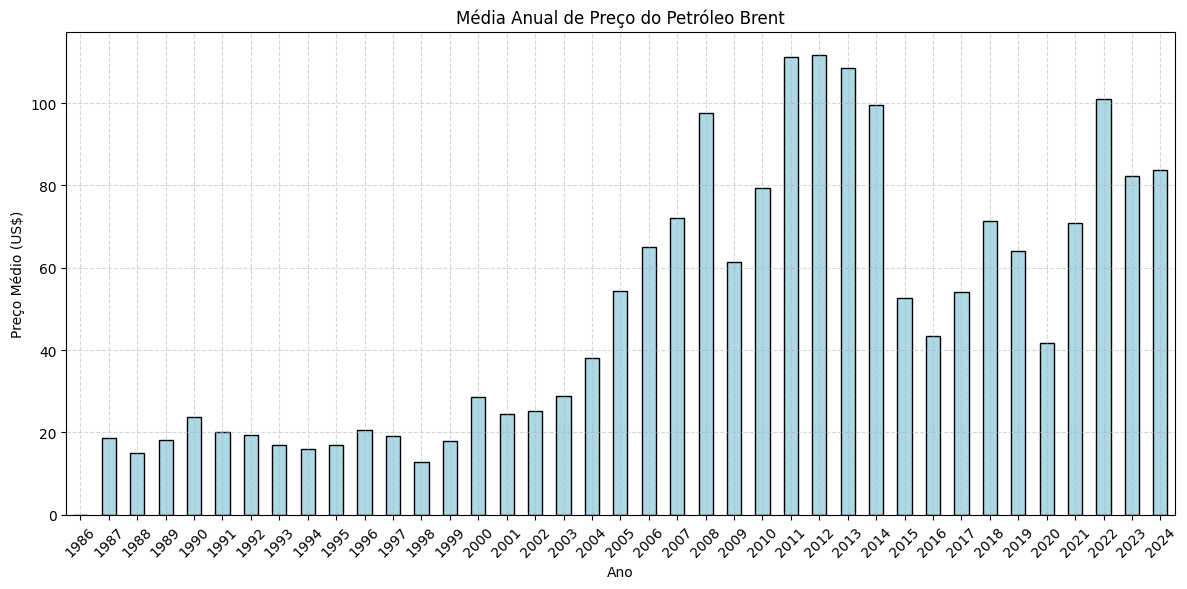

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Substitua esta parte pelo seu DataFrame 'babacu' já carregado
data = {
    'DATE': babacu.index,  # Supondo que 'DATE' seja o índice do seu DataFrame 'babacu'
    'VALUE (US$)': babacu['VALUE (US$)']  # Supondo que 'VALUE (US$)' seja a coluna com os valores de preço
}
babacu = pd.DataFrame(data)

# Calcular a média de cada ano
media_por_ano = babacu.groupby(babacu.index.year)['VALUE (US$)'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
media_por_ano.plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel('Ano')
plt.ylabel('Preço Médio (US$)')
plt.title('Média Anual de Preço do Petróleo Brent')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
!pip install dash plotly pandas


 4370/11202 [==========>...................] - ETA: 1:50 - loss: 2.2682e-04

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import ipeadatapy as ipy

# Passo 1: Obter os Dados do IPEA usando ipeadatapy
# Usamos a biblioteca ipeadatapy para acessar a série temporal de preços do petróleo
data = ipy.timeseries('EIA366_PBRENT366')
data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)
data = data[['VALUE (US$)']].rename(columns={'VALUE (US$)': 'Price'})  # Renomeando a coluna para 'Price'

# Verificar as colunas disponíveis para garantir que os dados foram carregados corretamente
print(data.columns)

# Passo 2: Criar a aplicação Dash
app = dash.Dash(__name__)

# Layout do Dashboard
app.layout = html.Div([
    html.H1("Dashboard de Preços do Petróleo"),
    dcc.Graph(id='price-time-series'),

    # Seção de Insights
    html.Div([
        html.H2("Insights sobre o Preço do Petróleo"),

        # Insight 1: Impacto da Geopolítica
        html.H3("Impacto da Geopolítica"),
        dcc.Graph(id='geopolitical-impact'),
        html.P("Análise do impacto de eventos geopolíticos nos preços do petróleo. Inclui eventos como conflitos, sanções e outras perturbações que afetam a oferta e demanda."),

        # Insight 2: Efeitos das Crises Econômicas
        html.H3("Efeitos das Crises Econômicas"),
        dcc.Graph(id='economic-crises'),
        html.P("Efeitos de crises econômicas globais e regionais no mercado de petróleo. Inclui a análise de recessões, depressões e crises financeiras."),

        # Insight 3: Demanda Global por Energia
        html.H3("Demanda Global por Energia"),
        dcc.Graph(id='global-demand'),
        html.P("A relação entre a demanda global por energia e as flutuações nos preços do petróleo. Inclui dados de consumo de energia por setor e região."),

        # Insight 4: Tendências Futuras
        html.H3("Tendências Futuras"),
        dcc.Graph(id='future-trends'),
        html.P("Identificação de tendências futuras com base em padrões históricos e dados disponíveis. Inclui previsões e análise de possíveis cenários futuros."),
    ])
])

# Callback para atualizar o gráfico principal de série temporal
@app.callback(
    Output('price-time-series', 'figure'),
    Input('price-time-series', 'id')
)
def update_main_graph(_):
    # Criar um gráfico de linha mostrando a variação do preço do petróleo ao longo do tempo
    fig = px.line(data, x=data.index, y='Price', title='Variação do Preço do Petróleo ao Longo do Tempo')
    fig.update_xaxes(title_text='Data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Callback para o impacto da geopolítica
@app.callback(
    Output('geopolitical-impact', 'figure'),
    Input('geopolitical-impact', 'id')
)
def update_geopolitical_impact(_):
    # Exemplo simples, substitua com sua análise geopolítica real
    fig = px.scatter(data, x=data.index, y='Price', title='Impacto da Geopolítica nos Preços do Petróleo')
    fig.update_xaxes(title_text='Data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Callback para os efeitos das crises econômicas
@app.callback(
    Output('economic-crises', 'figure'),
    Input('economic-crises', 'id')
)
def update_economic_crises(_):
    # Exemplo simples, substitua com sua análise de crises econômicas real
    fig = px.scatter(data, x=data.index, y='Price', title='Efeitos das Crises Econômicas nos Preços do Petróleo')
    fig.update_xaxes(title_text='Data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Callback para a demanda global por energia
@app.callback(
    Output('global-demand', 'figure'),
    Input('global-demand', 'id')
)
def update_global_demand(_):
    # Exemplo simples, substitua com sua análise de demanda global real
    fig = px.scatter(data, x=data.index, y='Price', title='Demanda Global por Energia e Preços do Petróleo')
    fig.update_xaxes(title_text='Data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Callback para as tendências futuras
@app.callback(
    Output('future-trends', 'figure'),
    Input('future-trends', 'id')
)
def update_future_trends(_):
    # Exemplo simples, substitua com sua análise de tendências futuras real
    fig = px.scatter(data, x=data.index, y='Price', title='Tendências Futuras dos Preços do Petróleo')
    fig.update_xaxes(title_text='Data')
    fig.update_yaxes(title_text='Preço do Petróleo (USD)')
    return fig

# Passo 3: Executar o aplicativo
if __name__ == '__main__':
    app.run_server(debug=True)


Index(['Price'], dtype='object')


<IPython.core.display.Javascript object>

Epoch 1/20
762/762 - 7s - loss: 0.0113 - 7s/epoch - 9ms/step
Epoch 2/20
762/762 - 4s - loss: 0.0016 - 4s/epoch - 5ms/step
Epoch 3/20
762/762 - 3s - loss: 0.0016 - 3s/epoch - 4ms/step
Epoch 4/20
762/762 - 3s - loss: 0.0014 - 3s/epoch - 4ms/step
Epoch 5/20
762/762 - 3s - loss: 0.0014 - 3s/epoch - 3ms/step
Epoch 6/20
762/762 - 3s - loss: 0.0014 - 3s/epoch - 4ms/step
Epoch 7/20
762/762 - 4s - loss: 0.0015 - 4s/epoch - 5ms/step
Epoch 8/20
762/762 - 3s - loss: 0.0014 - 3s/epoch - 3ms/step
Epoch 9/20
762/762 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 10/20
762/762 - 3s - loss: 0.0013 - 3s/epoch - 3ms/step
Epoch 11/20
762/762 - 3s - loss: 0.0014 - 3s/epoch - 4ms/step
Epoch 12/20
762/762 - 3s - loss: 0.0014 - 3s/epoch - 4ms/step
Epoch 13/20
762/762 - 2s - loss: 0.0014 - 2s/epoch - 3ms/step
Epoch 14/20
762/762 - 3s - loss: 0.0014 - 3s/epoch - 3ms/step
Epoch 15/20
762/762 - 3s - loss: 0.0013 - 3s/epoch - 3ms/step
Epoch 16/20
762/762 - 3s - loss: 0.0013 - 3s/epoch - 4ms/step
Epoch 17/20
762/7

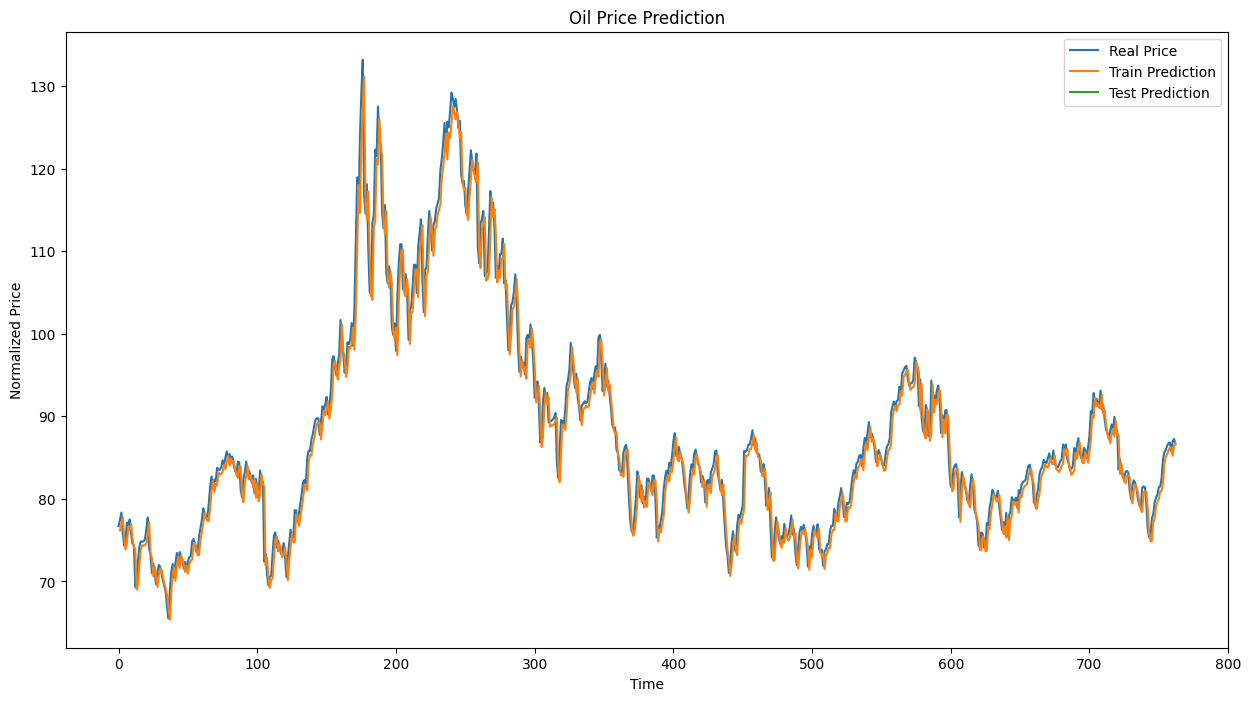

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import ipeadatapy as ipy

def load_and_prepare_data(series_code, look_back):
    data = ipy.timeseries(series_code)
    data['Years'] = pd.to_datetime(data.index)
    data.set_index('Years', inplace=True)
    data = data[['VALUE (US$)']].dropna().rename(columns={'VALUE (US$)': 'Price'})

    # Filtrar os dados para os últimos 3 anos
    end_date = data.index.max()
    start_date = end_date - pd.DateOffset(years=3)
    data = data[start_date:end_date]

    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)
    X, Y = [], []
    for i in range(len(data_scaled) - look_back):
        a = data_scaled[i:(i + look_back), 0]
        X.append(a)
        Y.append(data_scaled[i + look_back, 0])
    return np.array(X), np.array(Y), scaler, data

def plot_predictions(data, train_predict, test_predict, look_back):
    plt.figure(figsize=(15, 8))
    plt.plot(data['Price'].reset_index()['Price'], label='Real Price')
    plt.plot(np.arange(look_back, look_back + len(train_predict)), train_predict, label='Train Prediction')
    plt.plot(np.arange(len(data) - len(test_predict), len(data)), test_predict, label='Test Prediction')
    plt.title('Oil Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.show()

def main():
    look_back = 1
    X, Y, scaler, data = load_and_prepare_data('EIA366_PBRENT366', look_back)

    # Aqui, estamos utilizando todos os dados para treino e teste
    train_size = len(X)
    X_train, Y_train = X[:train_size], Y[:train_size]

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(1, look_back)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=2)

    train_predict = model.predict(X_train)
    train_predict = scaler.inverse_transform(train_predict)

    train_score = np.sqrt(mean_squared_error(Y_train, train_predict[:, 0]))
    print(f'Train Score: {train_score} RMSE')

    plot_predictions(data, train_predict, [], look_back)

if __name__ == '__main__':
    main()


16/16 [==============================] - 4s 232ms/step - loss: 0.0041
Epoch 2/50
16/16 [==============================] - 3s 205ms/step - loss: 0.0073
Epoch 3/50
16/16 [==============================] - 3s 171ms/step - loss: 0.0043
Epoch 8/50
16/16 [==============================] - 3s 214ms/step - loss: 0.0043
Epoch 9/50
16/16 [==============================] - 4s 232ms/step - loss: 0.0042
Epoch 9/50
16/16 [==============================] - 3s 211ms/step - loss: 0.0043
Epoch 10/50
16/16 [==============================] - 2s 152ms/step - loss: 0.0040
Epoch 12/50
16/16 [==============================] - 2s 140ms/step - loss: 0.0028
Epoch 22/50
16/16 [==============================] - 3s 182ms/step - loss: 0.0038
Epoch 16/50
16/16 [==============================] - 3s 164ms/step - loss: 0.0034
Epoch 17/50
16/16 [==============================] - 2s 142ms/step - loss: 0.0027
Epoch 26/50
Epoch 18/50
16/16 [==============================] - 2s 150ms/step - loss: 0.0037
Epoch 18/50
16/16 [==

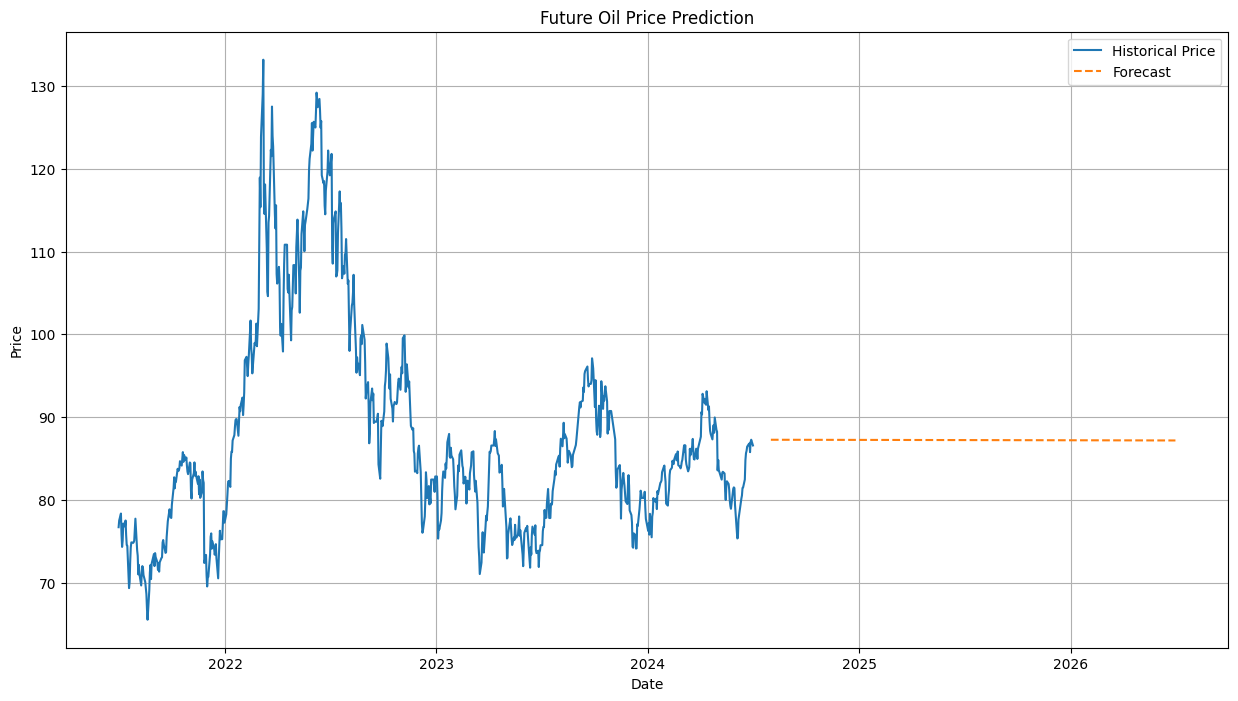

 9769/11202 [=========================>....] - ETA: 1:44 - loss: 2.0276e-04

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import ipeadatapy as ipy

def load_and_prepare_data(series_code, look_back):
    data = ipy.timeseries(series_code)
    data['Date'] = pd.to_datetime(data.index)
    data.set_index('Date', inplace=True)
    data = data[['VALUE (US$)']].dropna().rename(columns={'VALUE (US$)': 'Price'})

    # Filter data to last 3 years for training
    end_date = data.index.max()
    start_date = end_date - pd.DateOffset(years=3)
    data = data[start_date:end_date]

    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)
    X, Y = [], []
    for i in range(len(data_scaled) - look_back):
        a = data_scaled[i:(i + look_back), 0]
        X.append(a)
        Y.append(data_scaled[i + look_back, 0])
    return np.array(X), np.array(Y), scaler, data

def forecast_future(model, last_data, steps, scaler):
    forecast = last_data
    for _ in range(steps):
        # Reshape for model prediction
        X_pred = forecast[-1].reshape(1, 1, 1)
        pred = model.predict(X_pred)
        forecast = np.append(forecast, pred)
    forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
    return forecast[-steps:]

def plot_predictions(data, predictions, look_back):
    future_index = pd.date_range(start=data.index[-1], periods=len(predictions) + 1, freq='MS')[1:]
    plt.figure(figsize=(15, 8))
    plt.plot(data['Price'], label='Historical Price')
    plt.plot(future_index, predictions, label='Forecast', linestyle='--')
    plt.title('Future Oil Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    look_back = 1
    X, Y, scaler, data = load_and_prepare_data('EIA366_PBRENT366', look_back)
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(1, look_back)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, Y, epochs=20, batch_size=1, verbose=2)

    # Forecast for the next 24 months
    predictions = forecast_future(model, X[-1:], 24, scaler)
    plot_predictions(data, predictions, look_back)

if __name__ == '__main__':
    main()
